In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


Task 1:

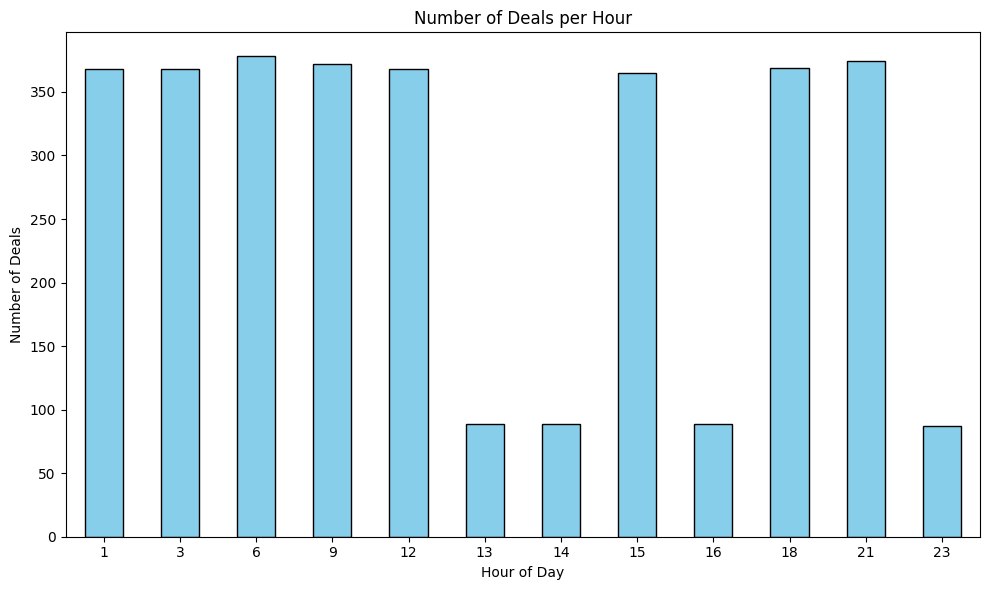

In [10]:

df = pd.read_csv('/content/cleaned_ebay_deals.csv')


df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

df.sort_values('timestamp', inplace=True)

df['hour'] = df['timestamp'].dt.hour


deals_count = df.groupby('hour').size()


plt.figure(figsize=(10, 6))
deals_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Deals per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Task 2:

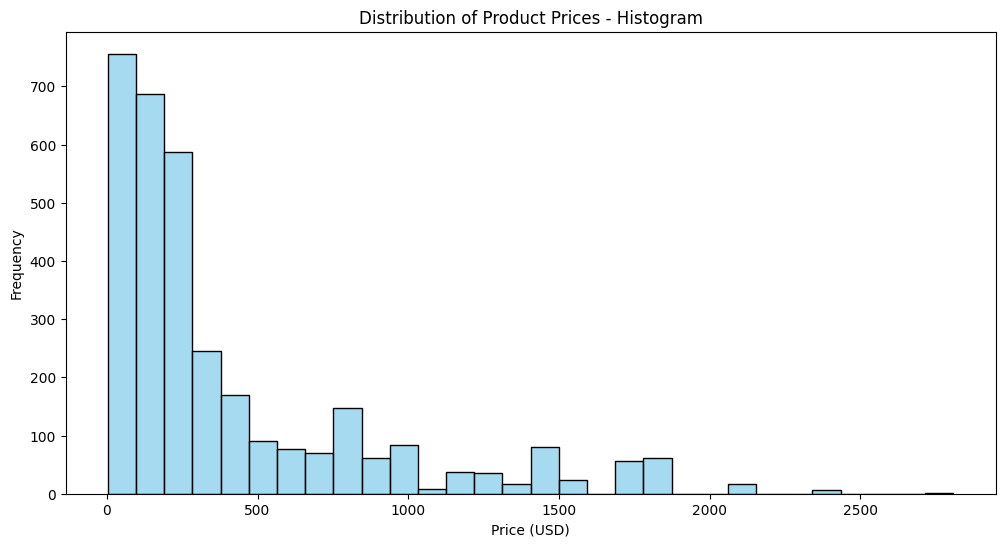

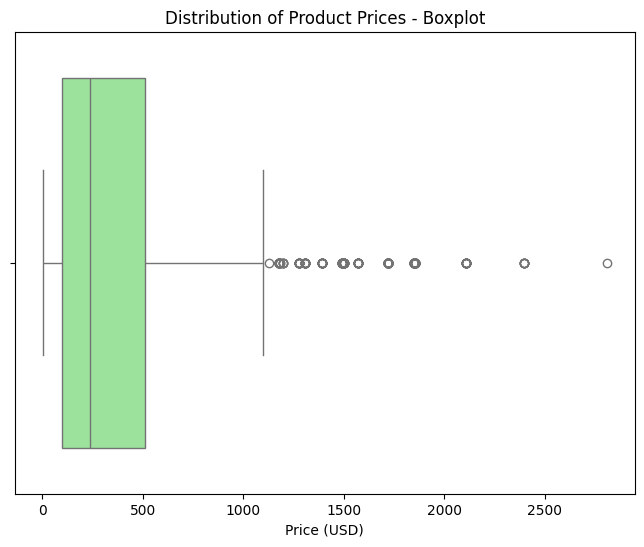

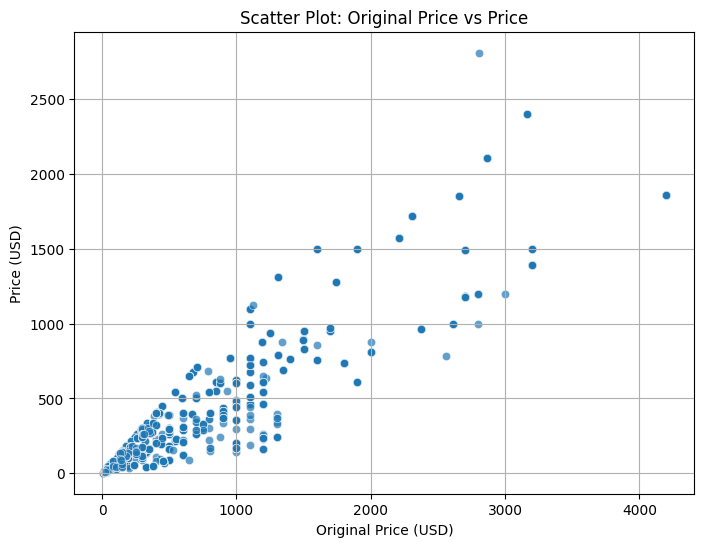

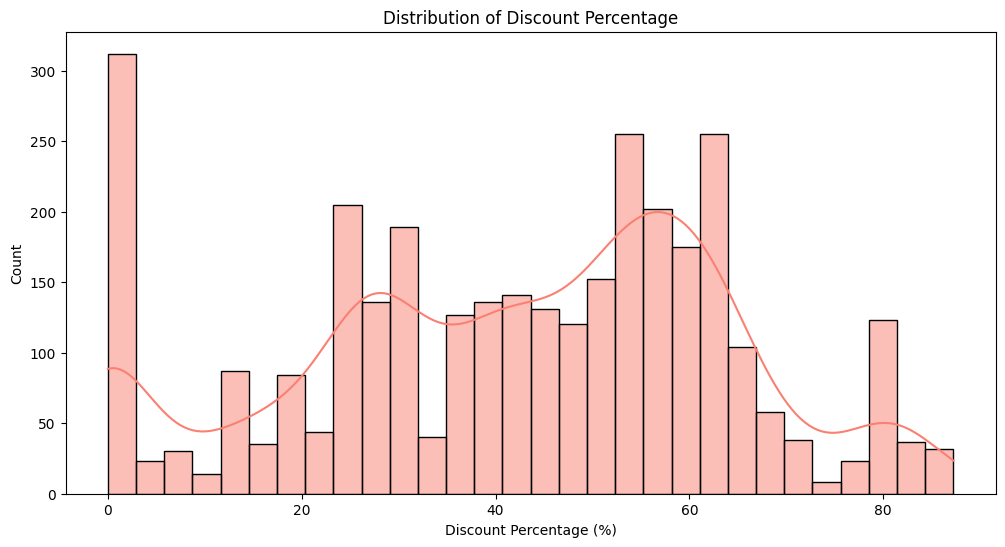

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices - Histogram')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Distribution of Product Prices - Boxplot')
plt.xlabel('Price (USD)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='original_price', y='price', data=df, alpha=0.7)
plt.title('Scatter Plot: Original Price vs Price')
plt.xlabel('Original Price (USD)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='salmon', edgecolor='black')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Count')
plt.show()

Task 3:

shipping
Shipping info unavailable    2510
Free shipping                 806
Name: count, dtype: int64


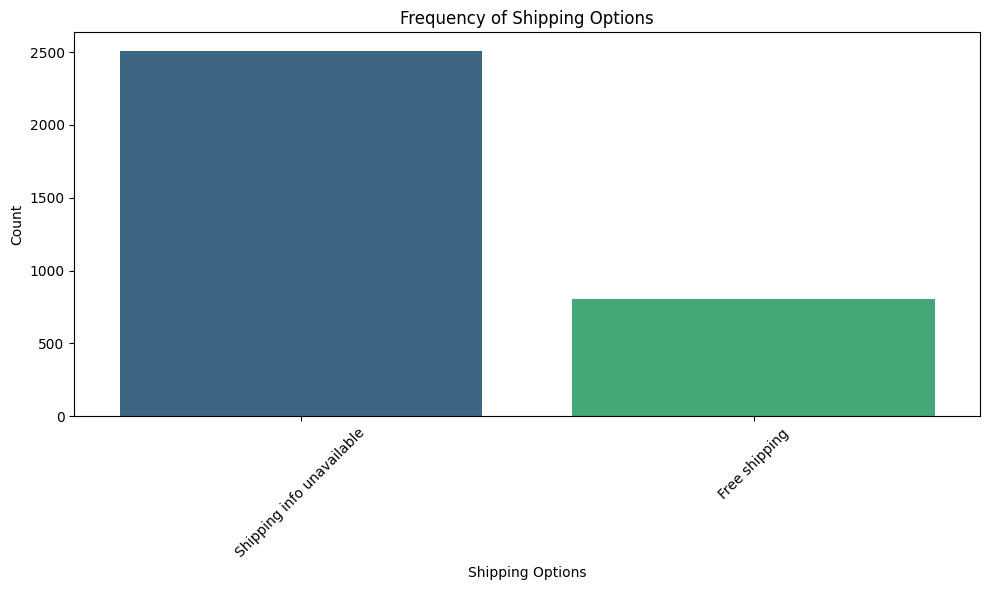

In [6]:
shipping_counts = df['shipping'].value_counts()
print(shipping_counts)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=shipping_counts.index,
    y=shipping_counts.values,
    hue=shipping_counts.index,
    dodge=False,
    palette='viridis'
)
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.title('Frequency of Shipping Options')
plt.xlabel('Shipping Options')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Task 4:

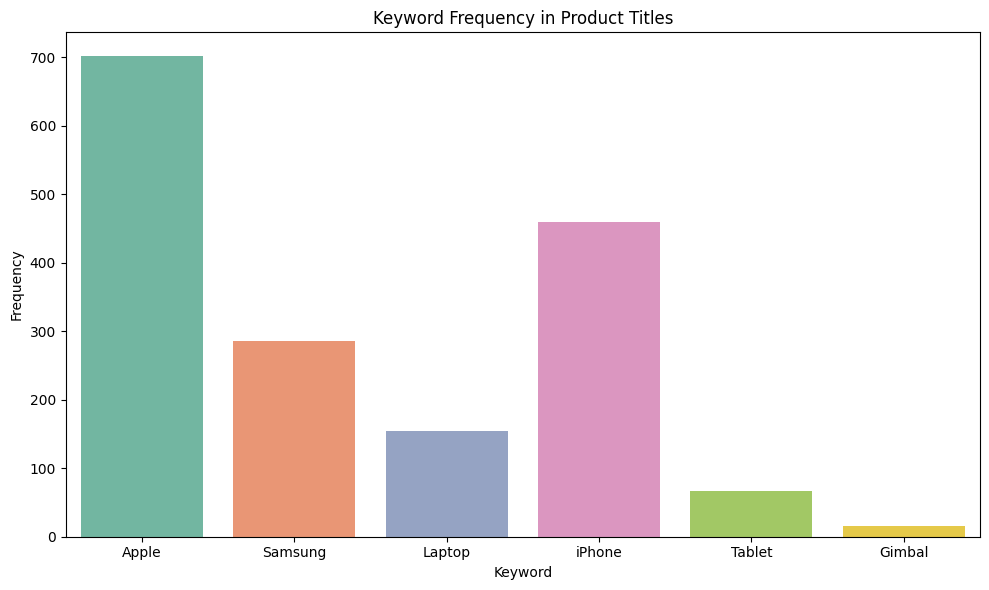

In [7]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]
keyword_counts = {}
for keyword in keywords:
    count = df['title'].str.count(keyword, flags=re.IGNORECASE).sum()
    keyword_counts[keyword] = count
keyword_counts_series = pd.Series(keyword_counts)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=keyword_counts_series.index,
    y=keyword_counts_series.values,
    hue=keyword_counts_series.index,
    dodge=False,
    palette='Set2'
)
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.title('Keyword Frequency in Product Titles')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Task 5

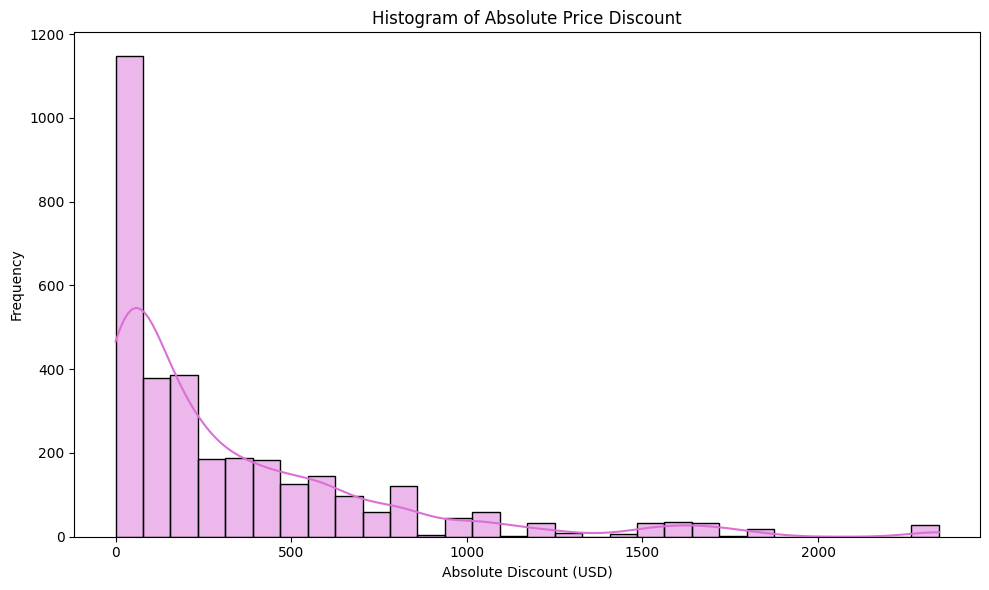

In [8]:
df['discount_abs'] = df['original_price'] - df['price']

plt.figure(figsize=(10, 6))
sns.histplot(df['discount_abs'], bins=30, kde=True, color='orchid', edgecolor='black')
plt.title('Histogram of Absolute Price Discount')
plt.xlabel('Absolute Discount (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Task 6:

In [9]:
top5_deals = (
    df.sort_values(by="discount_percentage", ascending=False)
      .drop_duplicates(subset=["title"])
      .head(5)
)
display(top5_deals)

,timestamp,title,price,original_price,shipping,item_url,discount_percentage,hour,discount_abs
735,2025-03-20 09:20:45,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,Shipping info unavailable,https://www.ebay.com/itm/387587045897?_trkparm...,87.25,9,287.05
1383,2025-03-21 06:28:40,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,49.99,379.99,Free shipping,https://www.ebay.com/itm/255880698895?_trkparm...,86.84,6,330.00
1845,2025-03-21 21:17:06,Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...,159.95,1199.99,Shipping info unavailable,https://www.ebay.com/itm/185698601733?_trkparm...,86.67,21,1040.04
2300,2025-03-22 12:34:01,"Apple iPhone 7 PLUS 5.5"" GSM Factory Unlocked ...",89.99,650.00,Shipping info unavailable,https://www.ebay.com/itm/192666024808?_trkparm...,86.16,12,560.01
2682,2025-03-23 01:38:15,Samsung Galaxy S21 5G SM-G991U1 128GB 256GB Un...,141.95,999.99,Shipping info unavailable,https://www.ebay.com/itm/204733115528?_trkparm...,85.80,1,858.04
